# Keras MLP with MNIST 
- use training set to learn the features and model parameters 
- use validation set to tune the model hyperparameters
- use test set to measure model performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#used to grab random samples to visualize
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras. utils.np_utils import to_categorical

Using TensorFlow backend.


### Functions

In [2]:
def getModel(l1, h1, alpha):
    """Returns a DNN model for the MNIST set"""
    model = Sequential()
    model.add(Dense(l1, input_dim=784, activation='relu'))
    model.add(Dense(h1, activation='relu'))
    model.add(Dense(10, activation='softmax')) #use softmax here because this is the output layer
    model.compile(Adam(alpha), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Get the dataset
- note the order of X_train, y_train, X_test, y_test!
- NOT the same as sklearn's train_test_split

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Plot a sample of the dataset
- changed the background color of the plot with fig.set_facecolor due to dark theme in my environment
- https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color

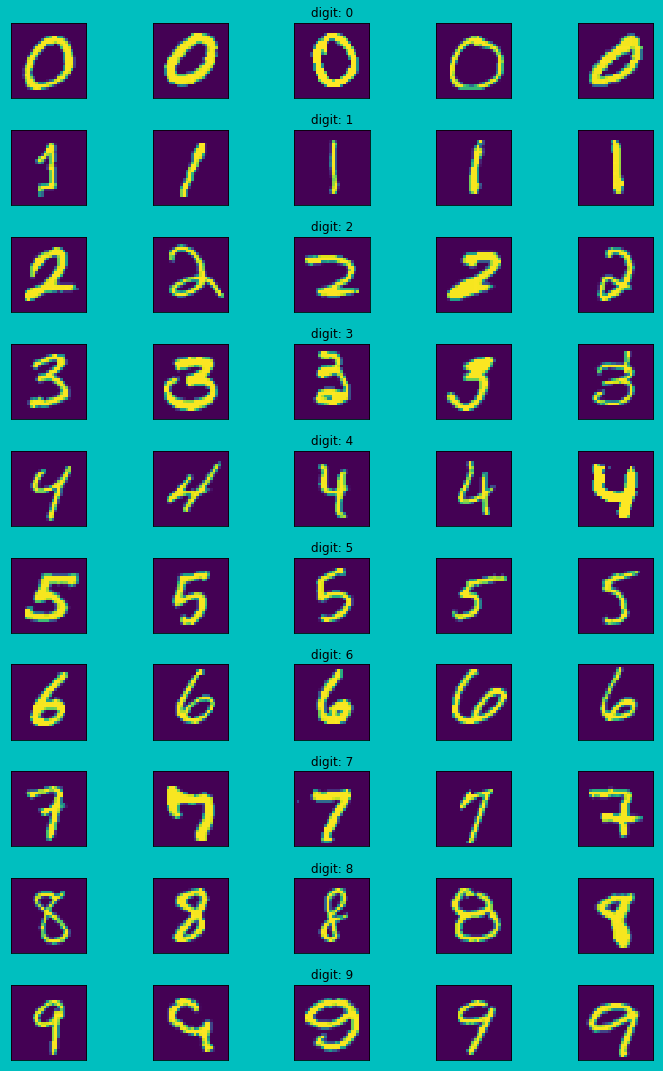

In [5]:
numSamples = []
rows = 10
cols = 5
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10,15))
fig.set_facecolor('c') #c for cyan
fig.tight_layout()
for i in range(0, cols):
    for j in range(0, rows):
        _x = X_train[y_train==j] #could iterate over a smaller set, but we need to count total number of samples per digit
        axes[j][i].imshow(_x[random.randint(0, len(_x)-1), :,:]) #could use cmap="gray"
        axes[j][i].set_xticks([]) #turns the tick marks off
        axes[j][i].set_yticks([])
        if(i == 2):
            axes[j][i].set_title("digit: %d" %j)
            numSamples.append(len(_x))

### Display training set distribution

([<matplotlib.axis.XTick at 0x7f994af367f0>,
 <a list of 10 Text xticklabel objects>)

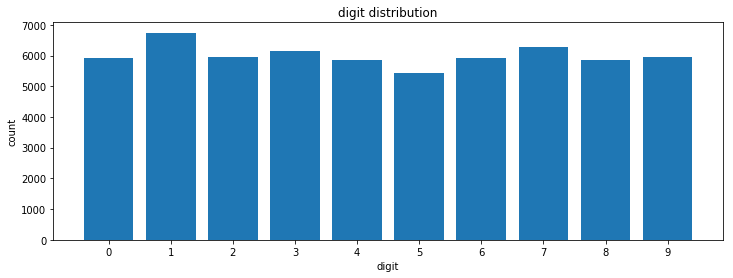

In [6]:
numSamples
plt.figure(figsize=(12,4))
plt.bar(range(0,rows), numSamples)
plt.title("digit distribution")
plt.xlabel("digit")
plt.ylabel("count")
plt.xticks(np.arange(0,10,1))

### Prepare the data
- use one hot encoding (to_categorical)
- normalize the data set, the math uses exponential numbers and e^1 is much smaller than e^255, also it ensures features are not misproportionally weighted
- flatten the training and test set

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
X_train = X_train / 255
y_train = y_train / 255

X_train = X_train.reshape(X_train.shape[0], 784) #images are 28x28, which is 784
X_test = X_test.reshape(X_test.shape[0], 784) #images are 28x28, which is 784

### Create a DNN model 

In [8]:
l1 = 10
h1 = 10
alpha = .01
model = getModel(l1, h1, alpha)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


### Train the DNN model
- split a validation set

In [9]:
hist = model.fit(X_train, y_train, validation_split=.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.0027 - acc: 0.7759 - val_loss: 0.0012 - val_acc: 0.9077
Epoch 2/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.0015 - acc: 0.8883 - val_loss: 0.0011 - val_acc: 0.9178
Epoch 3/10
54000/54000 [==============================] - 1s 12us/step - loss: 0.0013 - acc: 0.9003 - val_loss: 0.0010 - val_acc: 0.9213
Epoch 4/10
54000/54000 [==============================] - 1s 12us/step - loss: 0.0013 - acc: 0.9042 - val_loss: 0.0010 - val_acc: 0.9232
Epoch 5/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.0013 - acc: 0.9049 - val_loss: 0.0010 - val_acc: 0.9213
Epoch 6/10
54000/54000 [==============================] - 1s 12us/step - loss: 0.0012 - acc: 0.9085 - val_loss: 0.0010 - val_acc: 0.9213
Epoch 7/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.0012 - acc: 0.9096 - val_loss: 0.0011 - val_acc:

### Model performance
- good explaination of model loss and accuracy https://stackoverflow.com/questions/34518656/how-to-interpret-loss-and-accuracy-for-a-machine-learning-model


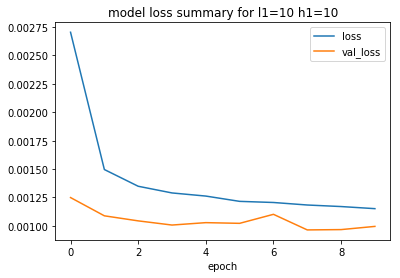

In [10]:
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.title("model loss summary for l1=10 h1=10")
plt.xlabel("epoch")
plt.legend()

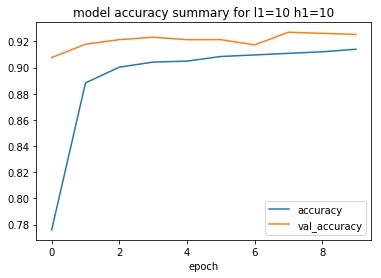

In [11]:
plt.plot(hist.history['acc'], label="accuracy")
plt.plot(hist.history['val_acc'], label="val_accuracy")
plt.title("model accuracy summary for l1=10 h1=10")
plt.xlabel("epoch")
plt.legend()

### What about a different network?
- what about changing epochs, batch size, validation split, or alpha?

In [12]:
l1 = 28 #nodes in first layer
h1 = 14 #nodes in hidden layer
alpha = .01
model2 = getModel(l1, h1, alpha)
print(model2.summary())
hist2 = model2.fit(X_train, y_train, validation_split=.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_5 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                150       
Total params: 22,536
Trainable params: 22,536
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.0015 - acc: 0.8871 - val_loss: 6.3611e-04 - val_acc: 0.9522
Epoch 2/10
54000/54000 [==============================] - 1s 13us/step - loss: 7.0255e-04 - acc: 0.9470 - val_loss: 5.4408e-04 - val_acc: 0.9593
Epoch 3/10
54000/54000 [==============================] - 1s 1

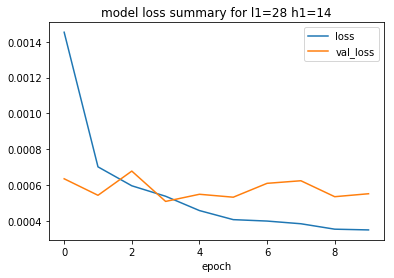

In [13]:
plt.plot(hist2.history['loss'], label="loss")
plt.plot(hist2.history['val_loss'], label="val_loss")
plt.title("model loss summary for l1=28 h1=14")
plt.xlabel("epoch")
plt.legend()

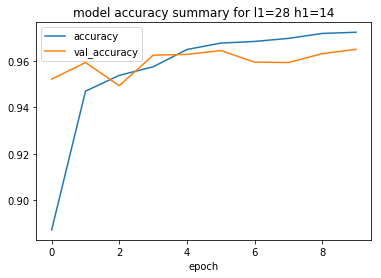

In [14]:
plt.plot(hist2.history['acc'], label="accuracy")
plt.plot(hist2.history['val_acc'], label="val_accuracy")
plt.title("model accuracy summary for l1=28 h1=14")
plt.xlabel("epoch")
plt.legend()

### Evaluate the models
- score is a measure of loss, accuracy is a measure of performance (see above link)

In [15]:
score1 = model.evaluate(X_test, y_test, verbose=0)
score2 = model2.evaluate(X_test, y_test, verbose=0)
print("first model score: {:.2f}, accuracy: {:.2f}".format(score1[0], score1[1]))
print("second model score: {:.2f}, accuracy: {:.2f}".format(score2[0], score2[1]))

first model score: 2.59, accuracy: 0.84
second model score: 0.83, accuracy: 0.95


### Test the models with a random image

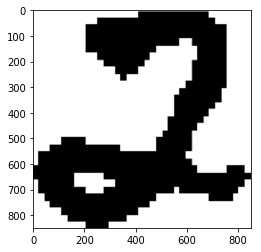

In [16]:
import cv2
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
res = requests.get(url, stream=True)
img = Image.open(res.raw)
plt.imshow(img)

(28, 28)


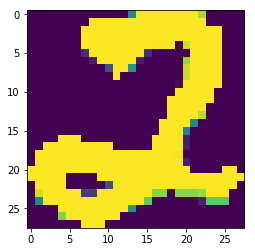

In [17]:
img = np.asarray(img)
img = cv2.resize(img, (28,28))
#need to invert the colors! (this is black on white, above digits are white on black)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
print(gray.shape)
plt.imshow(gray)

In [18]:
gray = gray/255
gray = gray.reshape(1, 784)


In [21]:
pred = model.predict_classes(gray)
pred2 = model2.predict_classes(gray)
print("first model score: {:.2f}, accuracy: {:.2f}".format(score1[0], score1[1]))
print("first model prediction: ", str(pred))
print("second model score: {:.2f}, accuracy: {:.2f}".format(score2[0], score2[1]))
print("second model prediction: ", str(pred2))

first model score: 2.59, accuracy: 0.84
first model prediction:  [2]
second model score: 0.83, accuracy: 0.95
second model prediction:  [6]


## This is why Neural Networks are so difficult to work with!
## Recapping their scores, it looks like model2 shold have made the correct prediction!

## This is why we use CNNs...

- https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/